In [ ]:
from google.colab import drive
drive.mount('/content/rive')

Drive already mounted at /content/rive; to attempt to forcibly remount, call drive.mount("/content/rive", force_remount=True).


## Credit Card Fraud Detection using Machine Learning

### Objective

To identify fraudulent credit card transactions using machine learning models and reduce business loss caused by undetected fraud.

### Business Problem

Credit card transaction data is **highly imbalanced**, where fraudulent transactions represent a very small percentage of total transactions. Traditional accuracy-based models fail to detect fraud effectively, making it necessary to focus on recall-oriented evaluation.

### Dataset

* Source: Kaggle Credit Card Fraud Dataset

### Challenges

* Severe class imbalance
* Accuracy is misleading
* High cost of false negatives (missed fraud cases)

### Approach

1. Performed Exploratory Data Analysis (EDA) to understand data distribution and imbalance
2. Split data into training and testing sets
3. Applied feature scaling for model stability
4. Built baseline model using Logistic Regression
5. Improved performance using Random Forest classifier
6. Focused evaluation on recall, F1-score, and ROC-AUC instead of accuracy

### Models Used

* Logistic Regression (Baseline Model)
* Random Forest Classifier

### Evaluation Metrics

* Recall (Primary metric)
* Precision
* F1-score
* ROC-AUC
* Confusion Matrix (visual analysis)

### Results

* Logistic Regression provided a strong baseline
* Random Forest improved fraud detection recall
* Visual analysis using confusion matrix showed better identification of fraudulent transactions

### Solution Summary

This project demonstrates a practical approach to solving a real-world fraud detection problem by prioritizing business impact over misleading accuracy metrics. The final model improves the identification of fraudulent transactions, helping reduce financial loss.

### Tools & Technologies

* Python
* Pandas, NumPy
* Scikit-learn
* Matplotlib

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/credit-card-fraud-detection-dataset-2023")

print("Path to dataset files:", path)

100%|██████████| 143M/143M [00:01<00:00, 125MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1


In [ ]:
import pandas as pd
import os

# The 'path' variable already holds the directory where the dataset was downloaded
# from the previous successful execution of cell XUUUjKfm7P4z.
# Let's find the CSV file within that directory.
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if csv_files:
    csv_file_name = csv_files[0] # Assuming there's only one CSV file or we take the first one
    full_csv_path = os.path.join(path, csv_file_name)
    print(f"Attempting to read CSV from: {full_csv_path}")
    try:
        df = pd.read_csv(full_csv_path)
    except UnicodeDecodeError:
        # If utf-8 fails, try a common alternative encoding like 'latin1' or 'ISO-8859-1'
        print("UTF-8 decoding failed, trying 'latin1' encoding...")
        df = pd.read_csv(full_csv_path, encoding='latin1')
else:
    print(f"No CSV files found in the downloaded dataset directory: {path}")
    df = None # Or handle the case where no CSV is found appropriately


Attempting to read CSV from: /root/.cache/kagglehub/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/versions/1/creditcard_2023.csv


In [ ]:
df.head(60)
df.tail(60)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568570,568570,-0.724866,0.747887,-0.505893,1.057870,-0.810309,-0.142561,-0.913214,0.545136,-1.455101,...,0.509365,0.772863,-0.166663,0.041635,0.003408,0.837332,0.788038,1.178331,4782.43,1
568571,568571,-0.687240,1.069267,-1.227772,1.958254,-1.078494,-1.530719,-1.426438,0.666274,-1.523485,...,0.709039,0.460136,0.403980,0.488647,-1.545738,0.886672,1.894506,1.756830,13186.20,1
568572,568572,0.510176,-0.206826,0.449107,-0.185590,0.520886,0.386604,0.516483,-0.132557,0.360232,...,-0.104117,-0.017669,-0.209290,-1.210004,0.755967,-0.471186,-0.240136,-0.032038,22708.40,1
568573,568573,0.405963,0.521971,-0.769837,1.068883,1.094743,-0.818393,0.163178,-0.044842,-0.999046,...,-0.019280,-0.628942,-0.102431,-0.479162,-0.201460,0.161547,0.370079,0.650328,18833.87,1
568574,568574,-0.928355,-0.476876,-0.467031,0.962175,-1.407144,2.314391,0.882342,-0.196807,-0.771353,...,-0.026801,1.128152,-1.312643,0.029417,-0.719893,0.814025,1.947098,-2.617199,12959.64,1
568575,568575,-0.239938,0.231934,-0.414072,0.109247,-0.050261,-0.001181,-0.281776,0.137813,-0.604871,...,0.219487,0.461162,-0.262046,-0.772033,0.323570,1.603965,0.576418,0.462223,20041.02,1
568576,568576,-0.489812,0.073603,-0.831569,0.049777,-0.670537,1.240656,0.311256,0.198015,-0.434260,...,0.232163,0.558229,1.016646,-1.091226,-2.624317,0.261073,1.299884,0.892037,12554.33,1
568577,568577,0.607534,-0.097747,0.350366,0.202374,0.878734,0.457594,0.825663,-0.187110,-0.141116,...,-0.085410,0.148302,-0.020999,0.360110,-0.613241,-0.616334,-0.150354,0.078883,16959.54,1
568578,568578,-0.314976,0.490963,-0.565212,1.062333,-0.548537,-0.435970,-0.753833,0.212671,-1.280150,...,0.415108,0.472190,-0.248205,-0.121581,0.568146,0.753547,1.631123,1.357062,19397.85,1
568579,568579,-0.455688,-0.557382,-0.287566,0.259139,-0.847753,0.742943,0.485158,-0.002715,-0.124916,...,0.277493,0.596792,1.834033,0.629954,0.605608,-0.407344,0.119461,0.485559,22887.08,1


In [ ]:
df_normal = df[df['Class'] == 0]
df_fraud = df[df['Class'] == 1]

In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,284315


In [ ]:
df.dtypes

,0
id,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df.nunique()

,0
id,568630
V1,552035
V2,552035
V3,552035
V4,552035
V5,552035
V6,552035
V7,552035
V8,552035
V9,552035


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
568625,False
568626,False
568627,False
568628,False


In [ ]:
print(df.duplicated().count())

568630


In [ ]:
df.isnull()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568626,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568627,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568628,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(df.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df=df.fillna(0)

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
df['Class'].value_counts()


,count
Class,
0,284315
1,284315


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

Text(0.5, 0, 'Class')

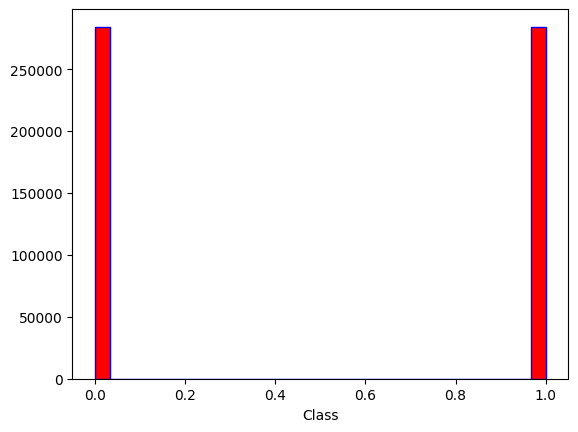

In [ ]:
plt.hist(df['Class'],bins=30,edgecolor='blue',color='red')
plt.xlabel('Class')

In [ ]:
df_numerical=df.select_dtypes(include=np.number)
df_numerical.columns



Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

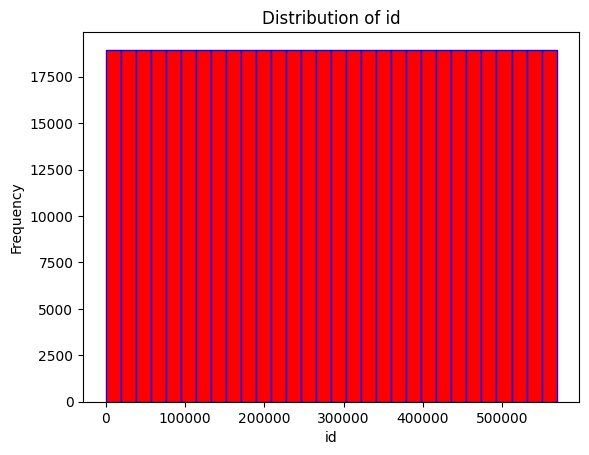

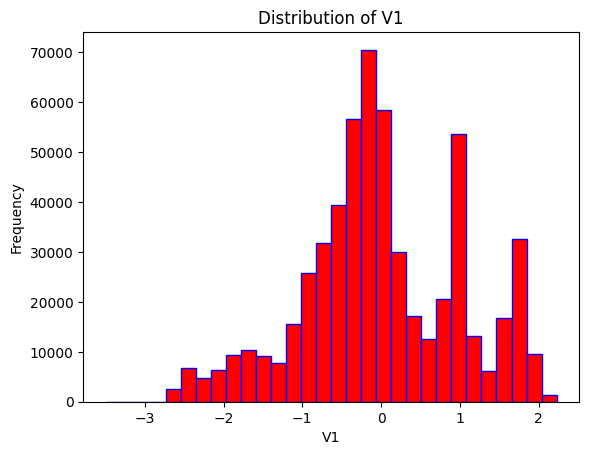

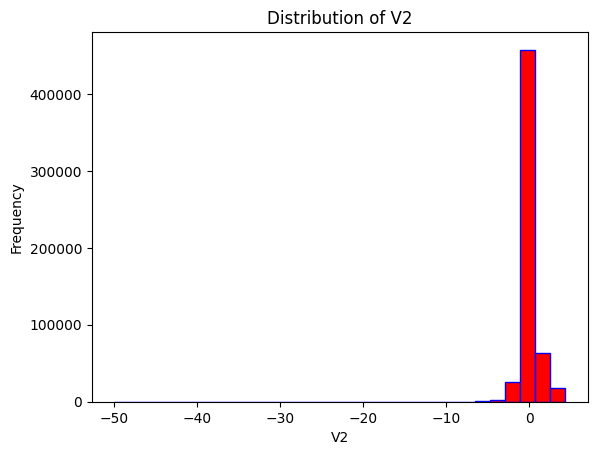

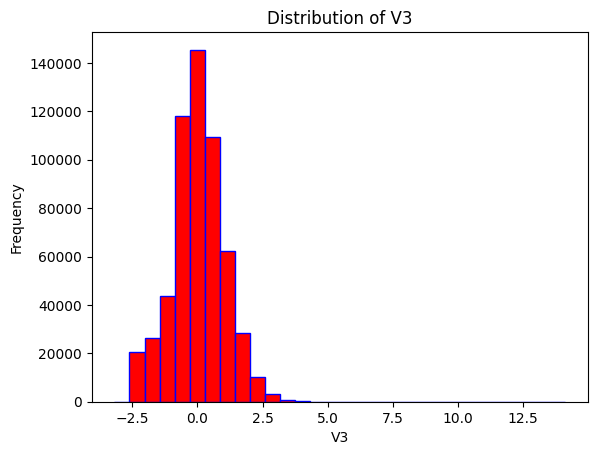

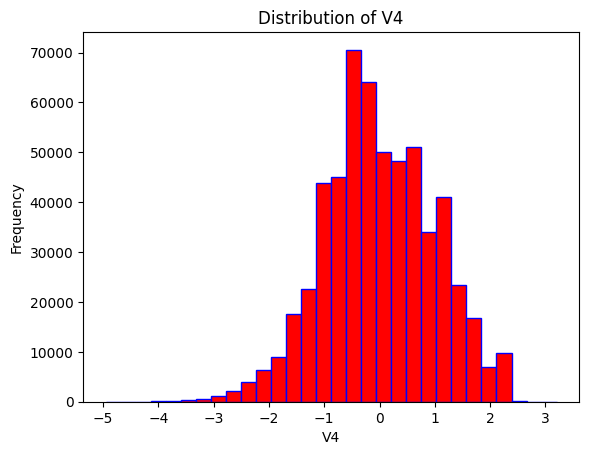

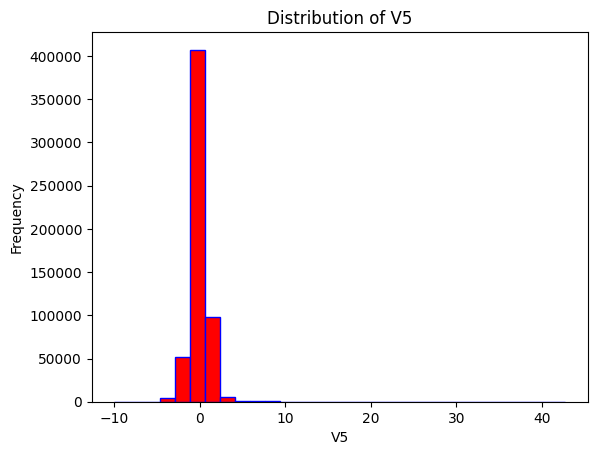

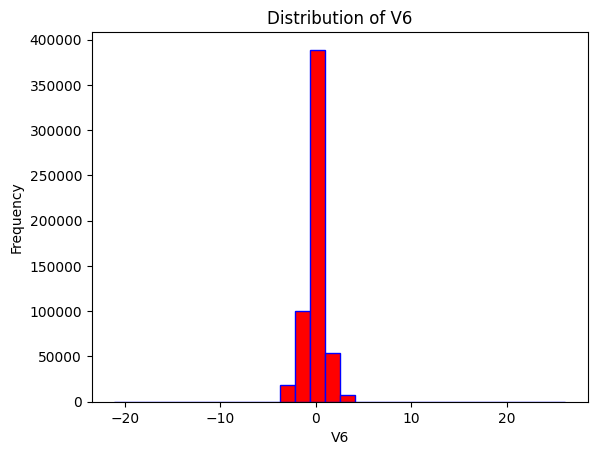

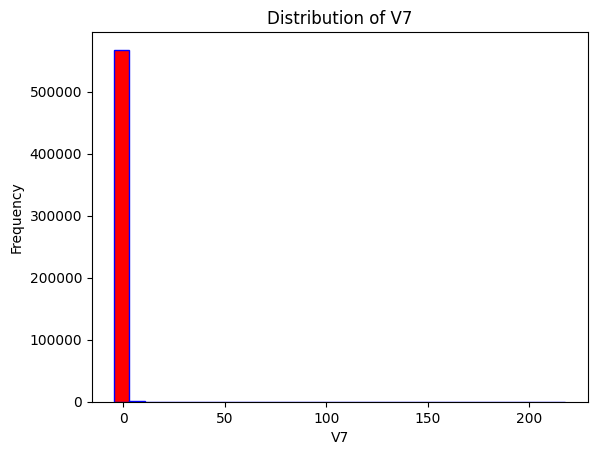

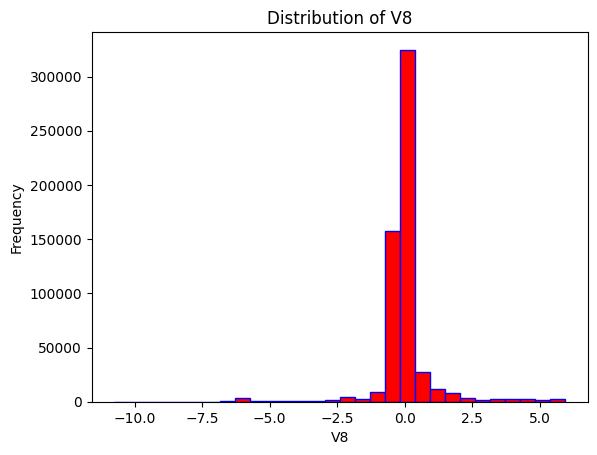

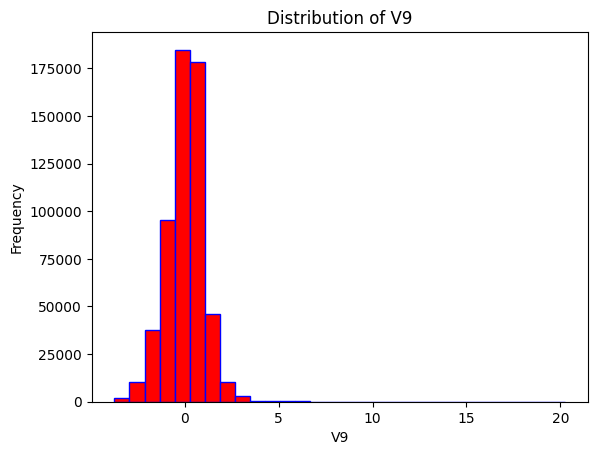

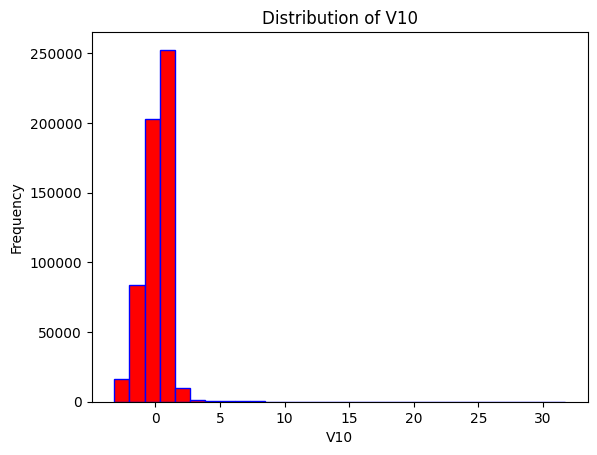

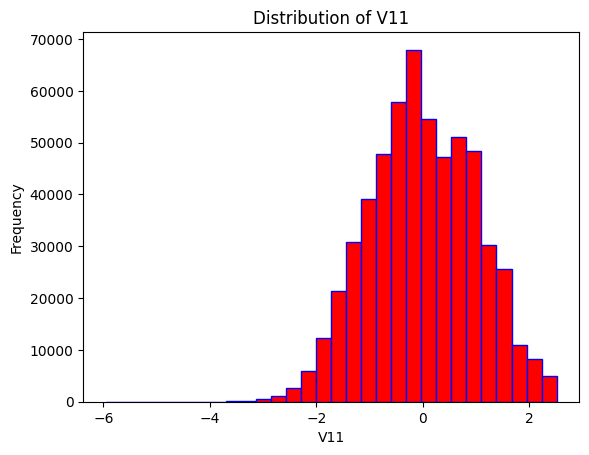

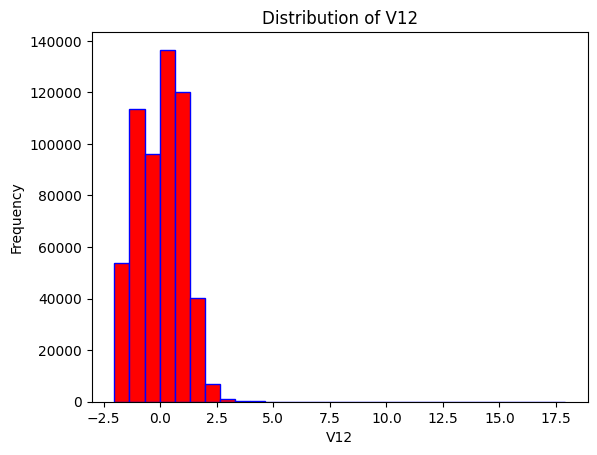

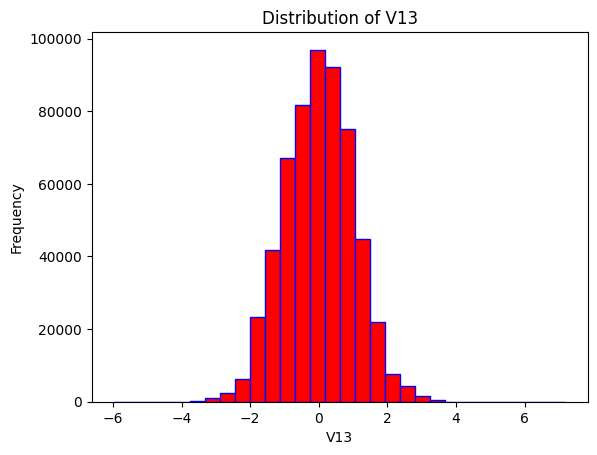

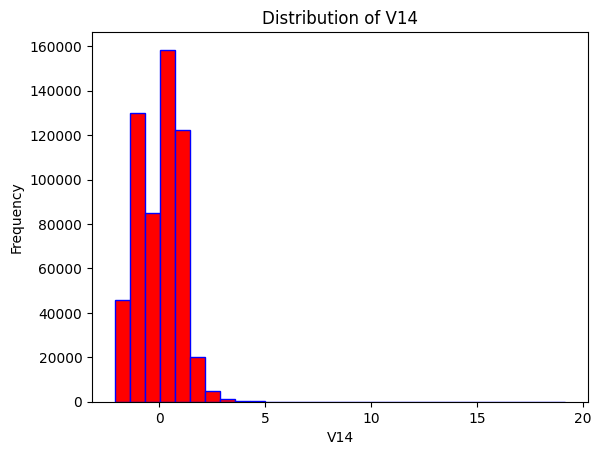

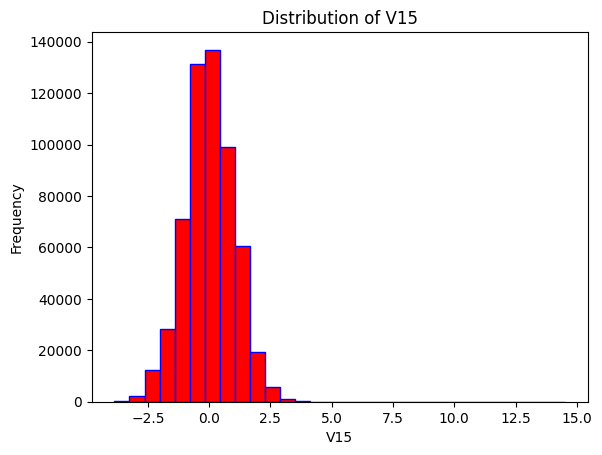

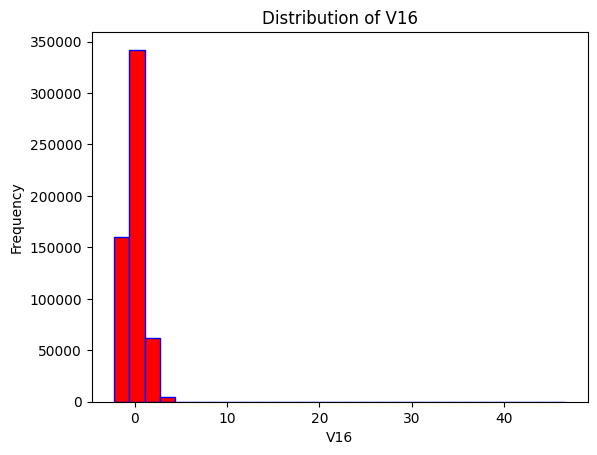

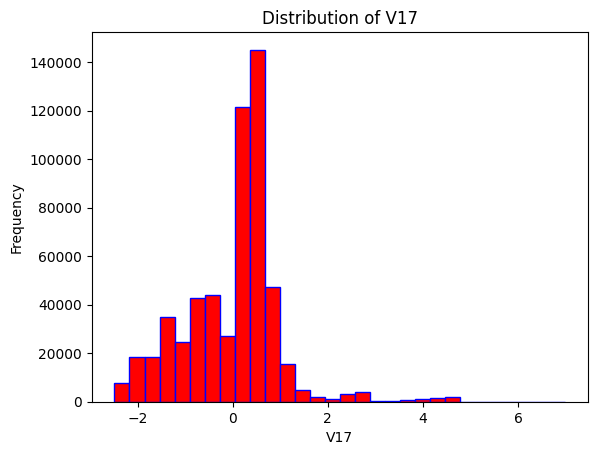

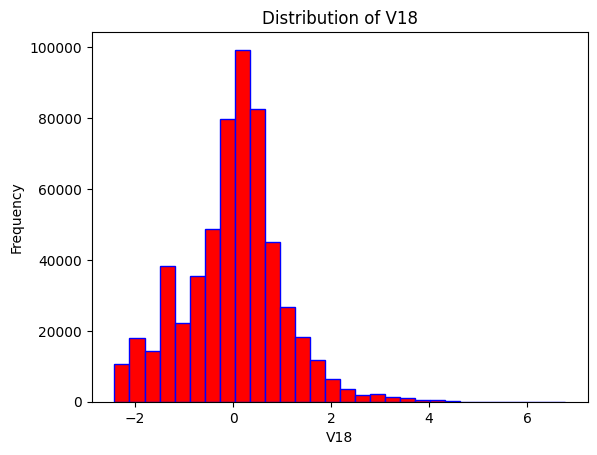

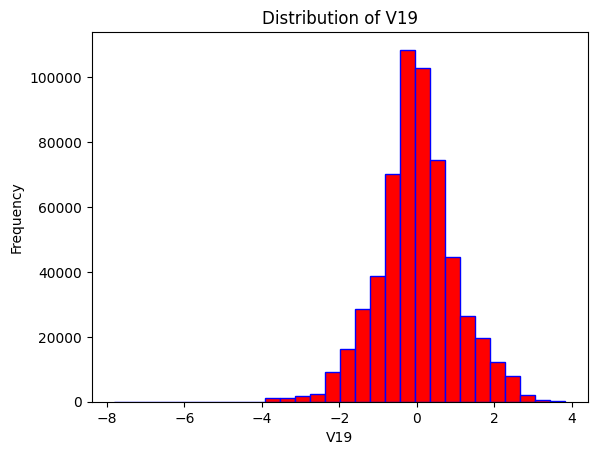

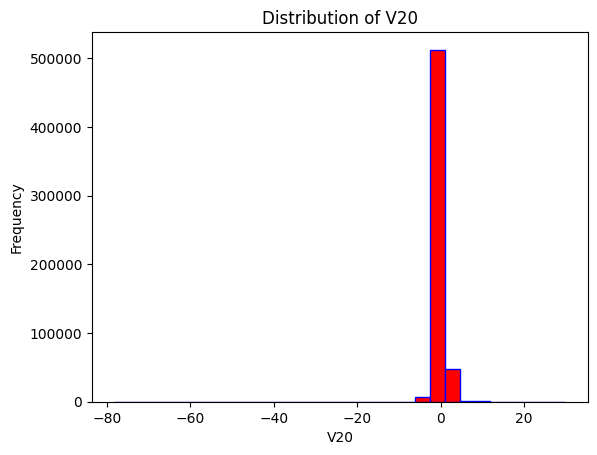

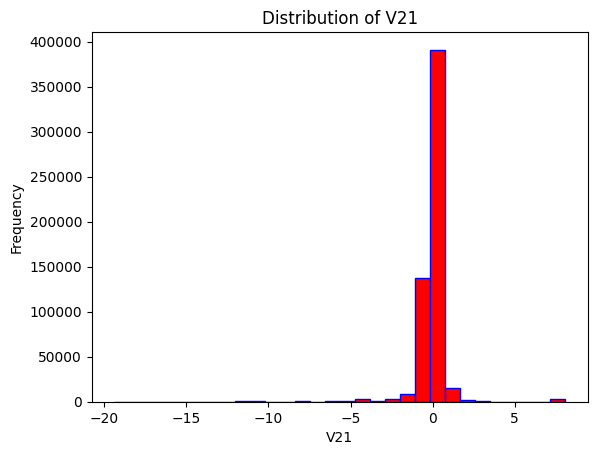

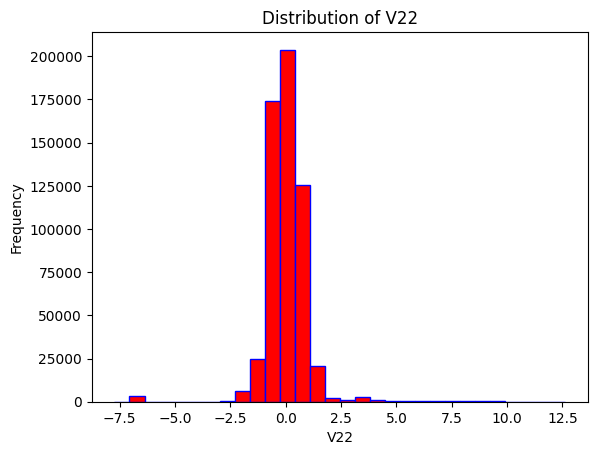

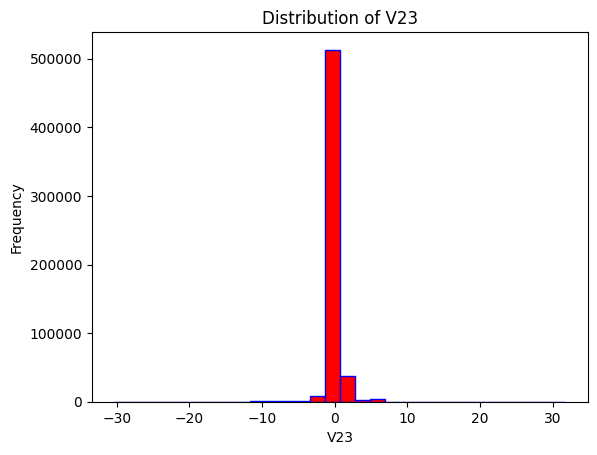

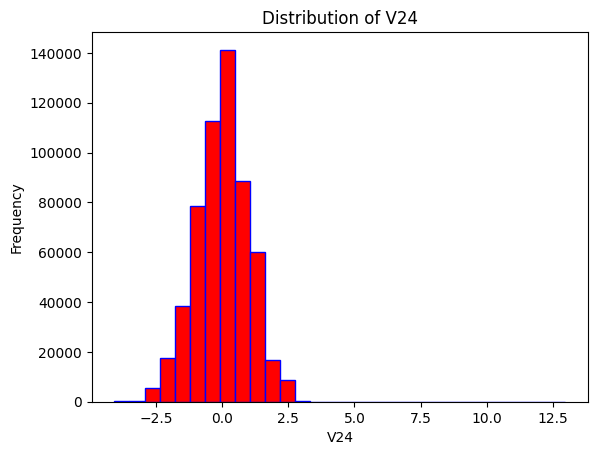

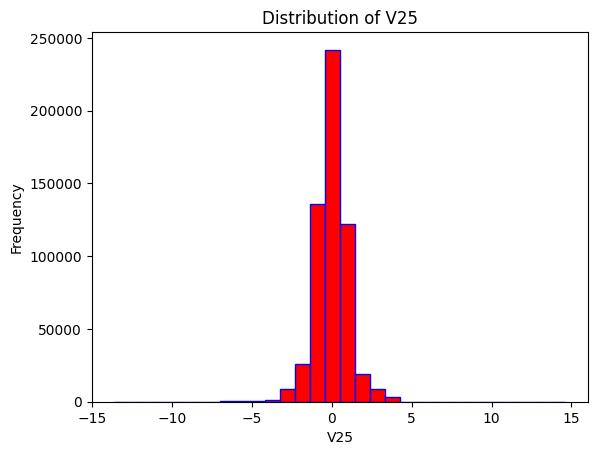

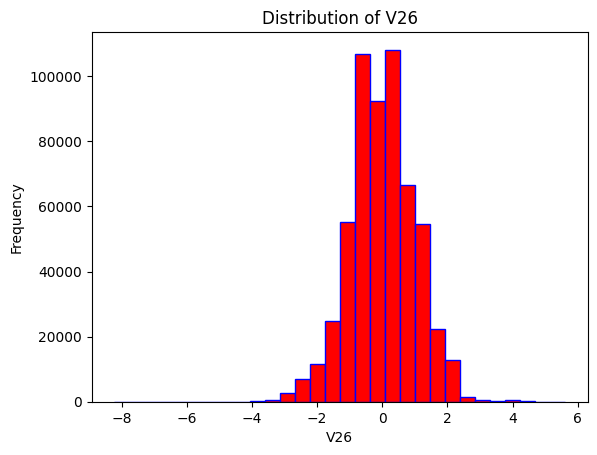

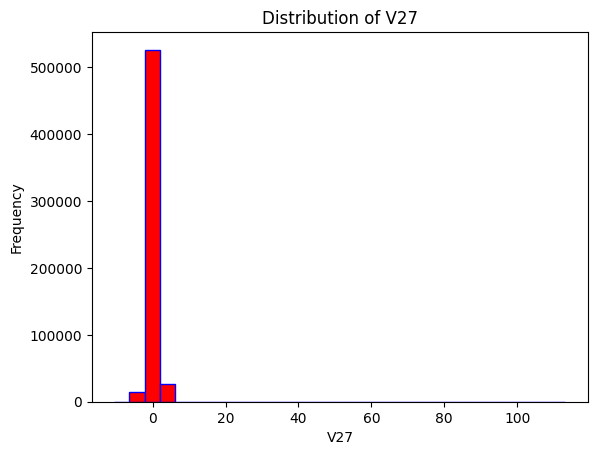

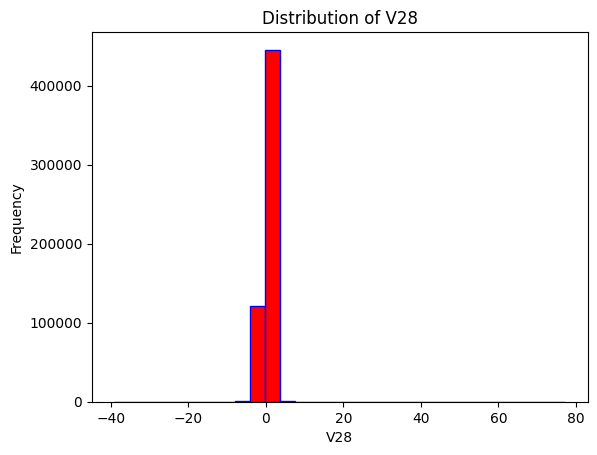

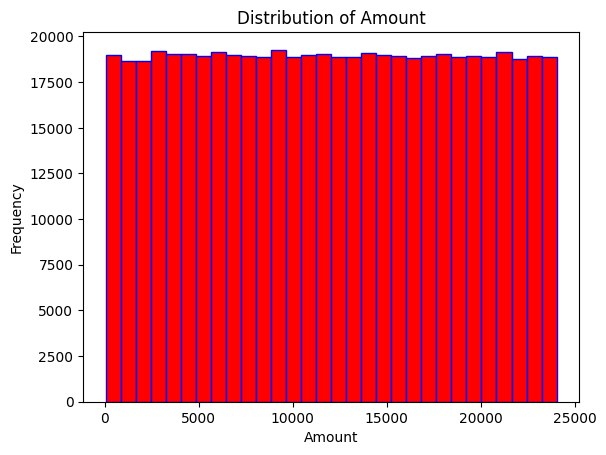

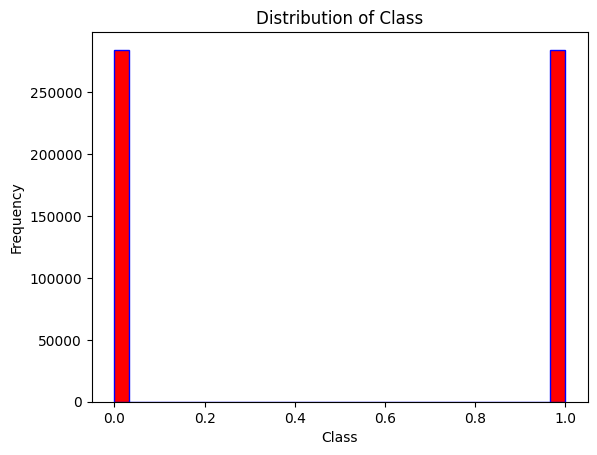

In [ ]:
for i in df_numerical.columns:
  plt.hist(df[i],bins=30,edgecolor='blue',color='red') # Plot histogram for current column i
  plt.xlabel(i) # Correctly call xlabel function
  plt.ylabel('Frequency') # Add a y-label for clarity
  plt.title(f'Distribution of {i}') # Add a title for clarity
  plt.show()

In [ ]:
df_numerical.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


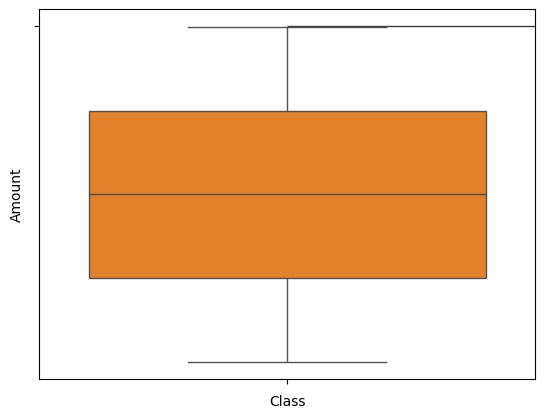

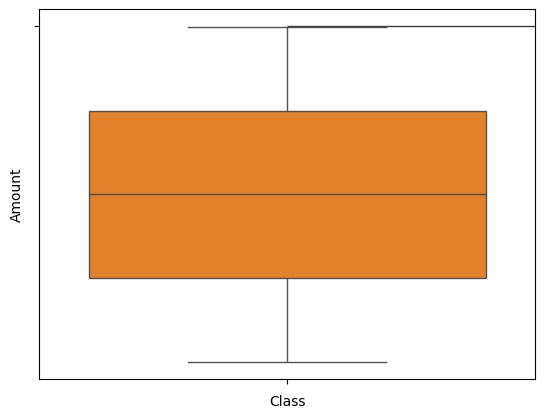

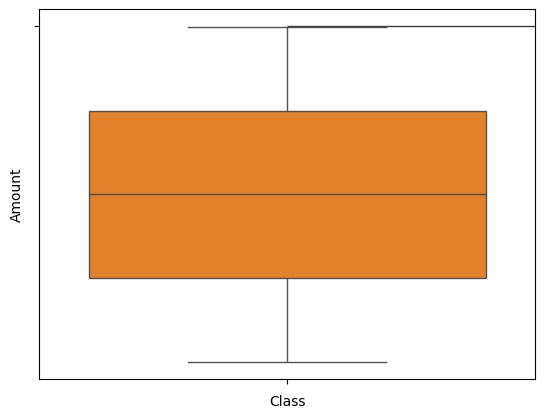

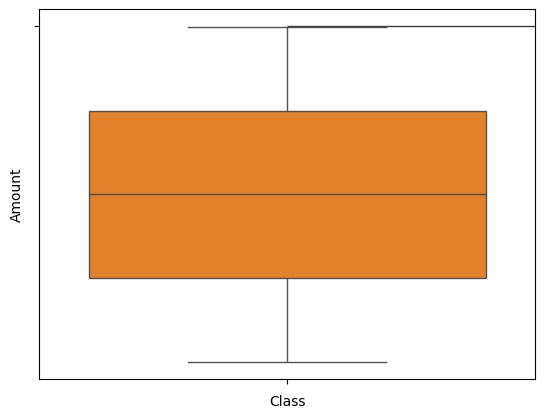

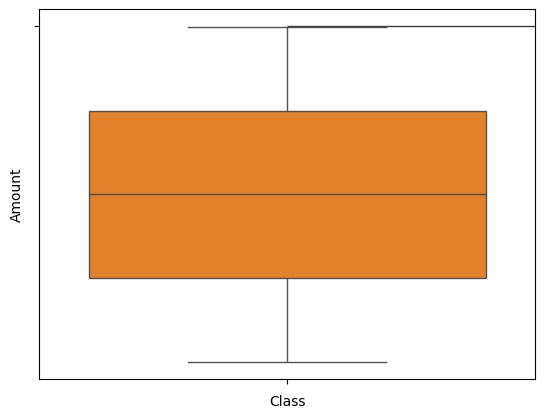

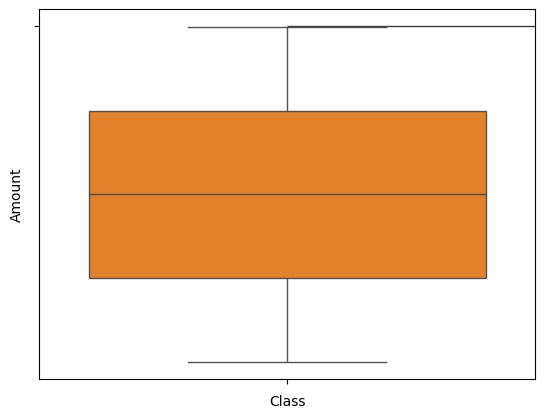

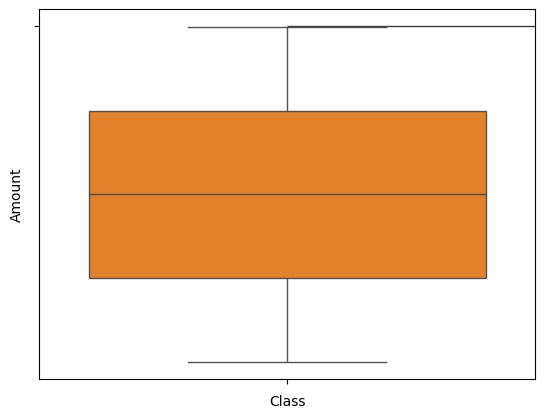

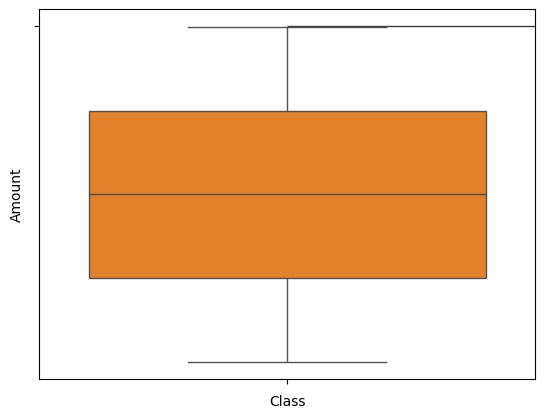

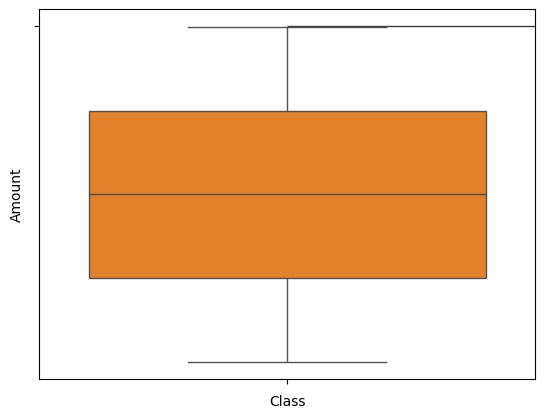

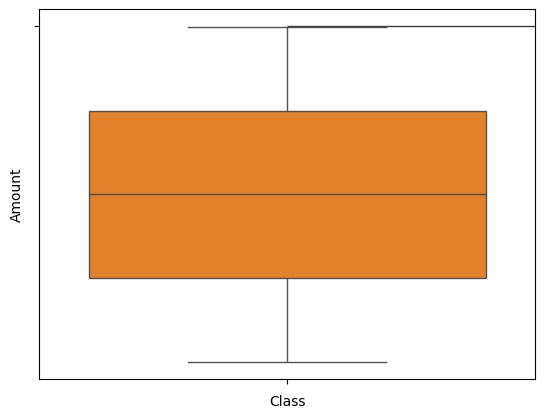

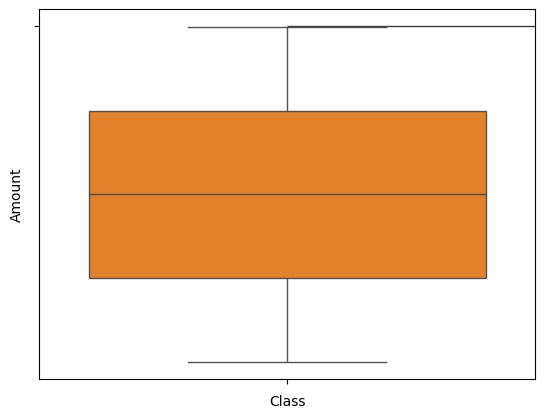

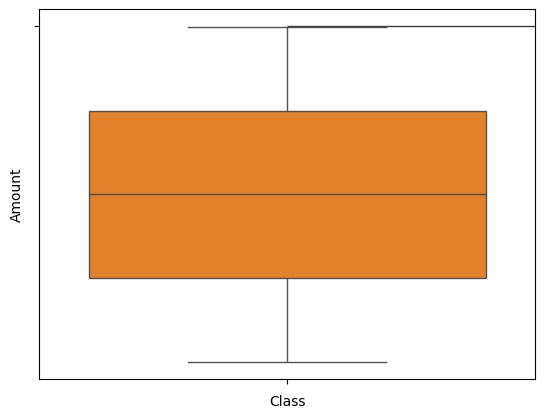

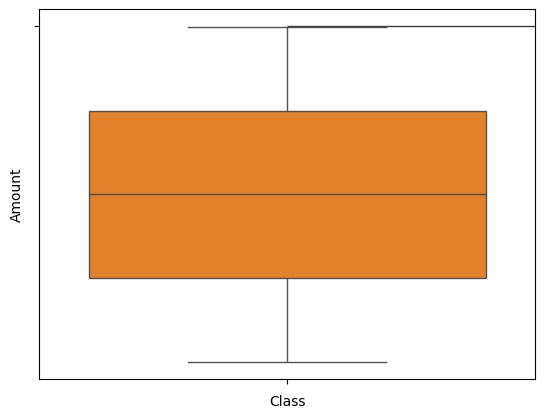

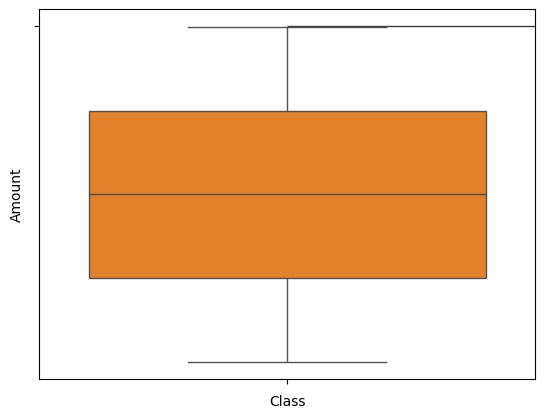

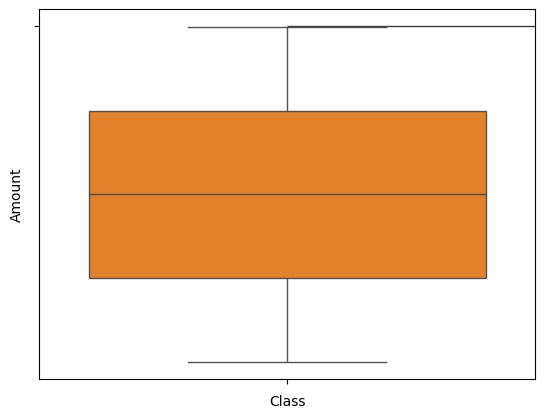

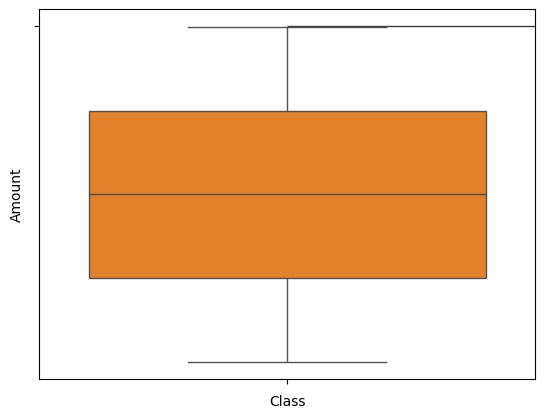

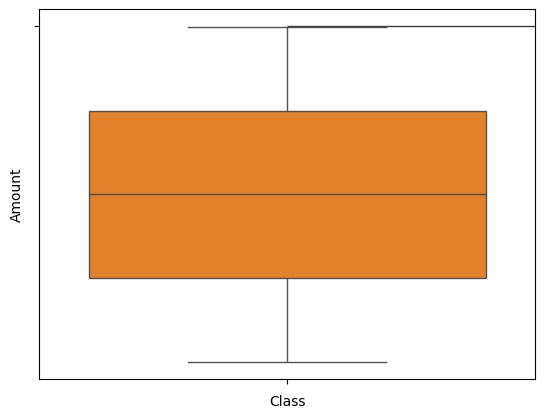

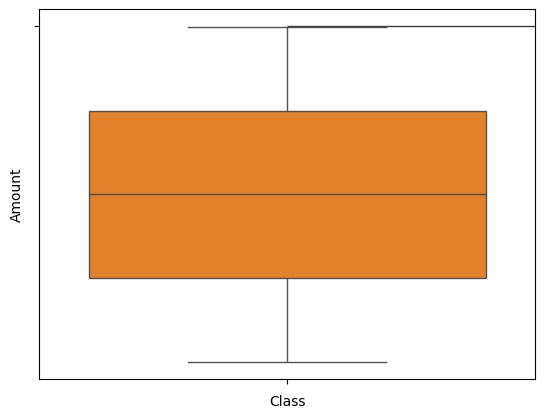

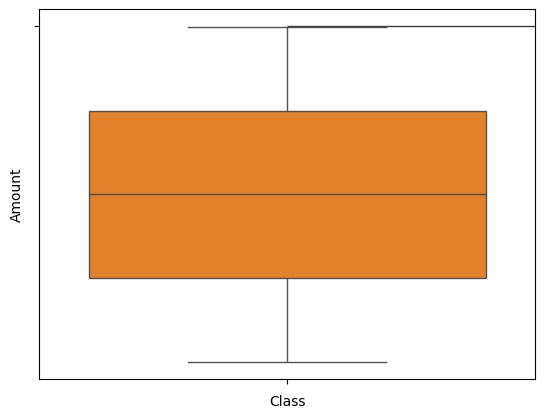

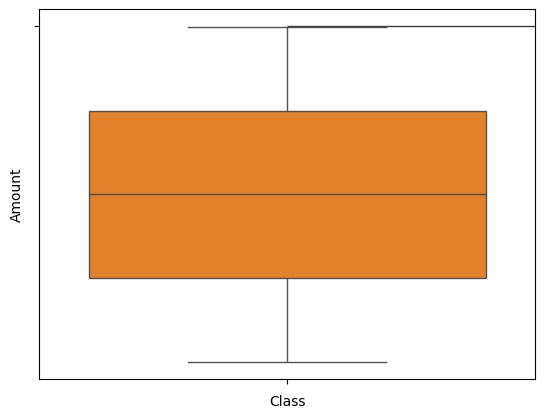

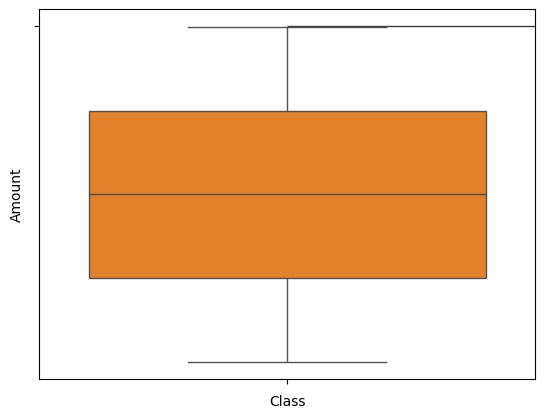

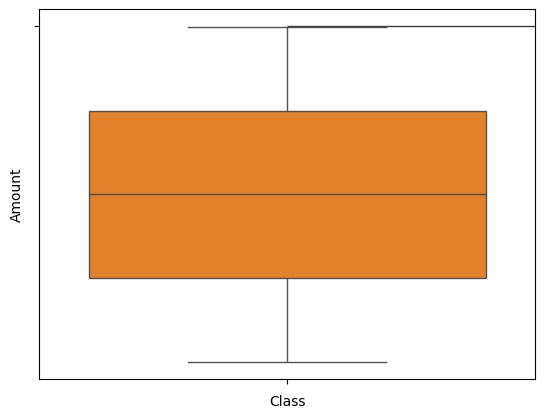

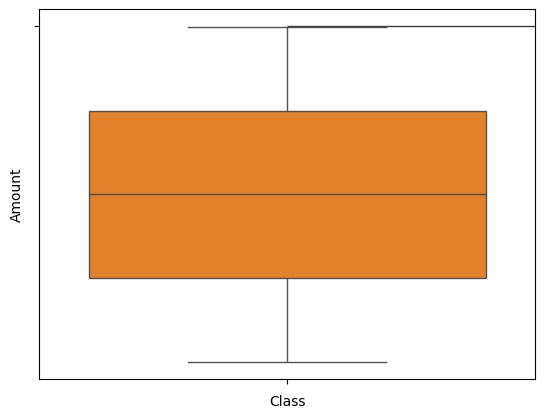

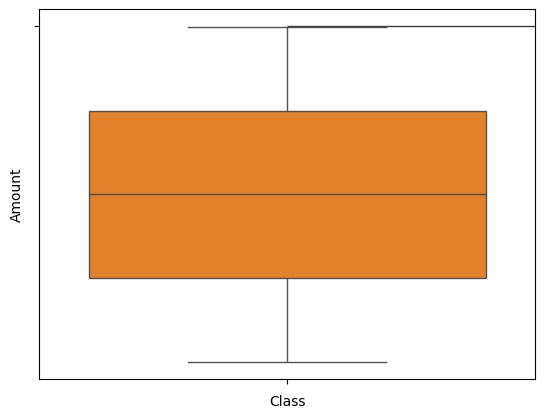

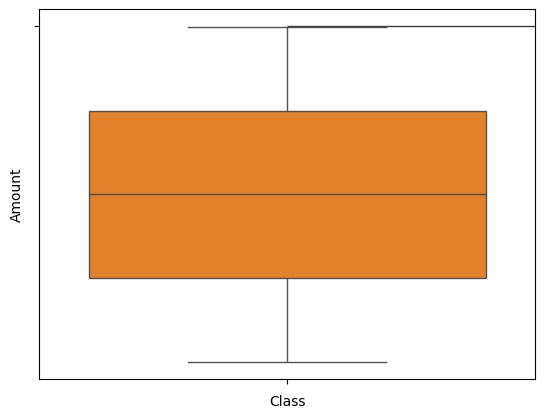

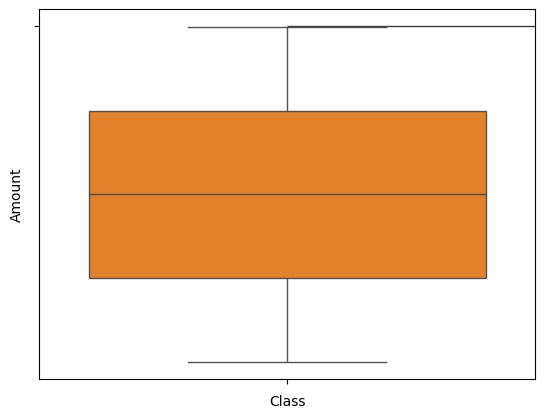

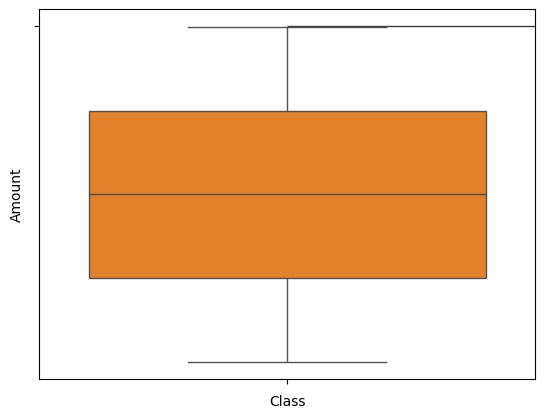

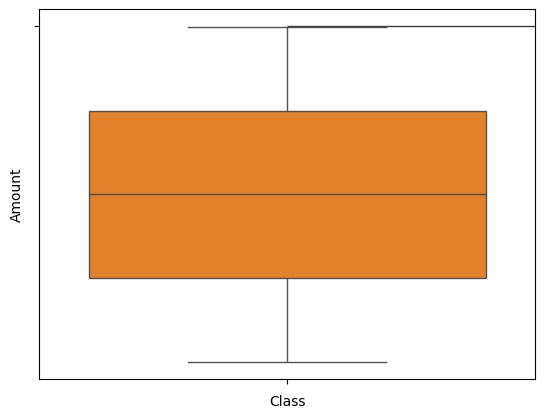

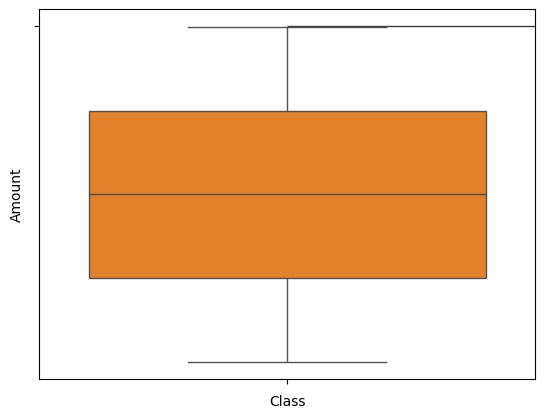

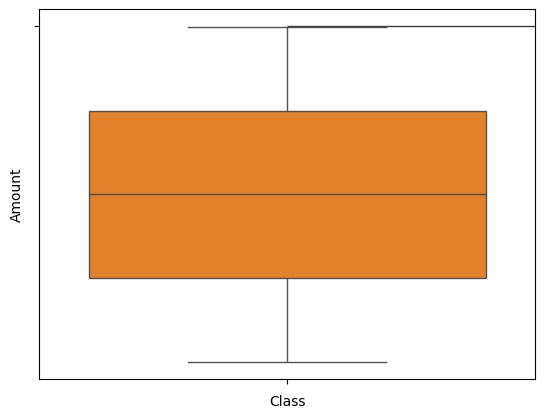

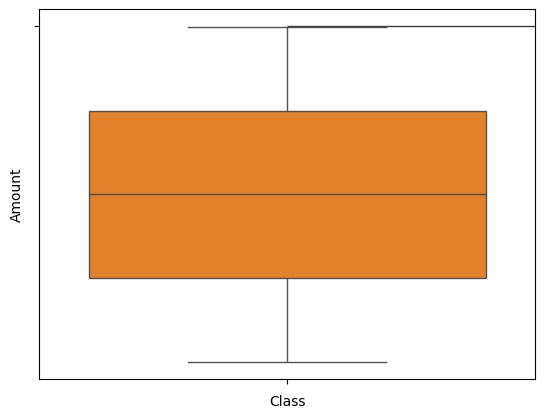

In [ ]:
for i in df_numerical.columns:
    sns.boxplot(data=df_numerical,x='Class')
    sns.boxplot(data=df_numerical,y='Amount')
    plt.show()

In [ ]:
Q1=df['Class'].quantile(0.25)
Q3=df['Class'].quantile(0.75)

IQR=Q3-Q1 # Inter_quartile_range

lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
print(Q1,Q3)
print(lower_bound,upper_bound)


0.0 1.0
-1.5 2.5


In [ ]:
df.drop(['id'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

Text(0, 0.5, 'Class')

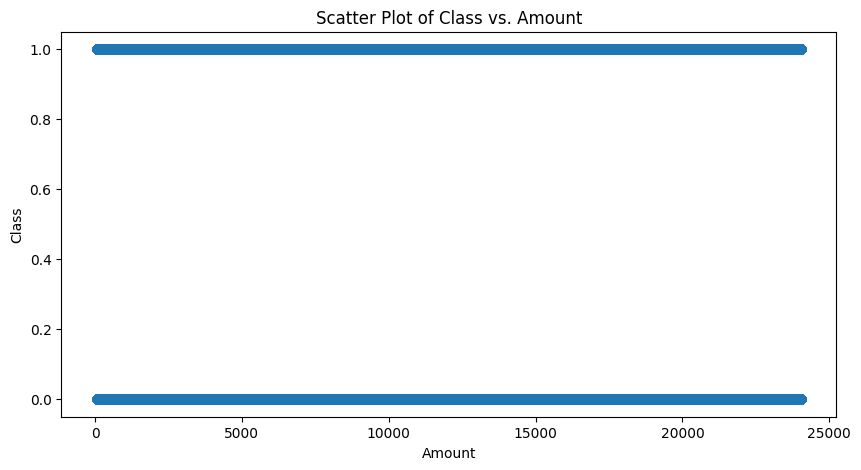

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Amount'],df['Class'])
plt.title('Scatter Plot of Class vs. Amount')
plt.xlabel('Amount')
plt.ylabel('Class')

Text(0, 0.5, 'Class')

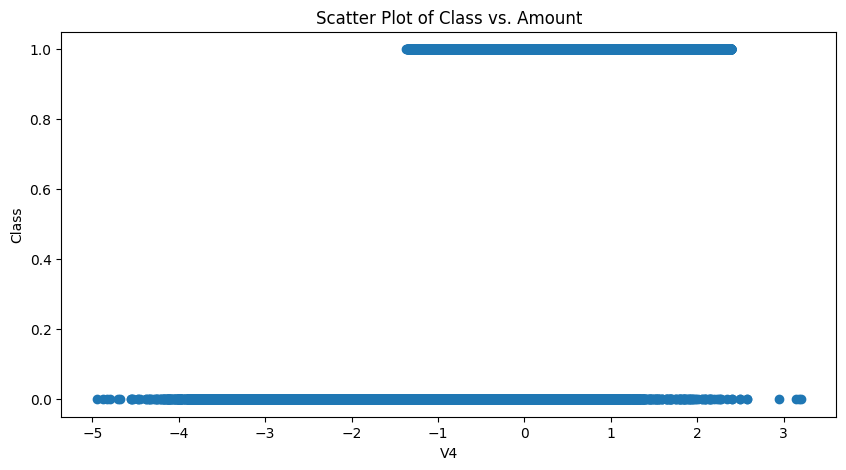

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['V4'],df['Class'])
plt.title('Scatter Plot of Class vs. Amount')
plt.xlabel('V4')
plt.ylabel('Class')

Text(0, 0.5, 'V1')

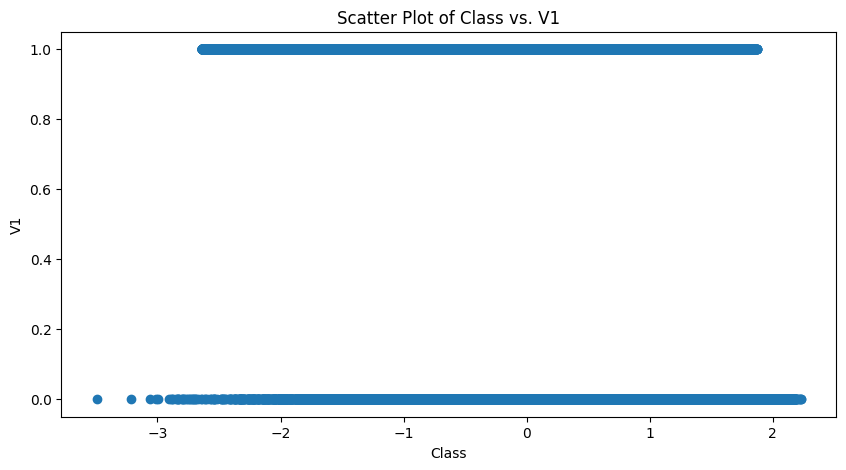

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['V1'],df['Class'])
plt.title('Scatter Plot of Class vs. V1')
plt.xlabel('Class')
plt.ylabel('V1')

In [ ]:
df.head(2001)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,-0.592147,0.337002,0.400862,-1.069387,-0.159526,-0.239920,0.302208,0.166316,0.960966,0.847507,...,-0.203557,-0.553966,0.122794,0.791442,0.160379,0.723590,0.456658,0.763764,10702.60,0
1997,-0.100411,-0.120732,0.889593,-0.672960,0.225662,0.401672,0.433562,0.035654,0.244293,0.389876,...,-0.176809,-0.685255,0.039036,-0.722985,-0.519855,0.270517,-0.102699,-0.087283,23440.49,0
1998,0.987620,-0.412906,0.443362,-0.213764,0.445702,0.917679,0.409531,-0.102237,0.585254,0.620105,...,-0.154451,-0.207104,-0.243421,-1.833469,1.233435,-0.604969,-0.200951,-0.113845,19347.95,0
1999,0.160994,-0.303343,0.800630,-1.471269,0.383900,0.017313,0.720205,-0.229618,-0.414131,0.682638,...,-0.008862,0.551123,-0.401328,-0.659473,0.736805,-0.166960,-0.210624,-0.010752,11023.16,0


Text(0.5, 0, 'Class')

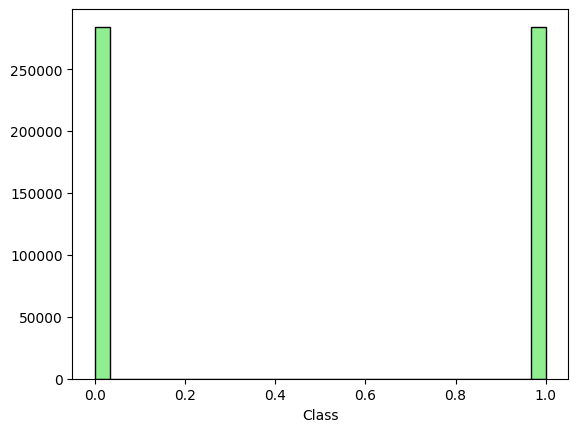

In [ ]:
plt.hist(df['Class'],bins=30,edgecolor='black',color='lightgreen')
plt.xlabel('Class')

   Class        Amount
0      0  3.419261e+09
1      1  3.428157e+09


Text(0, 0.5, 'Total Amount')

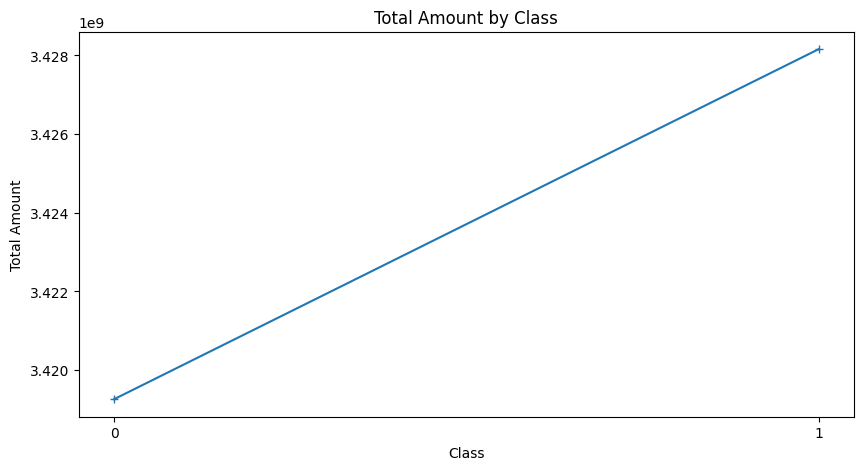

In [ ]:
plt.figure(figsize=(10, 5))
average_runs = df.groupby('Class')['Amount'].sum().reset_index()
print(average_runs)


plt.plot(average_runs['Class'].astype(str), average_runs['Amount'], marker='+')
plt.title('Total Amount by Class')
plt.xlabel('Class')
plt.ylabel('Total Amount')

   Class             V1             V2             V3             V4  \
0      0  143795.443007 -139848.301604  193929.972059 -209250.397236   
1      1 -143795.443007  139848.301604 -193929.972059  209250.397236   

             V5             V6             V7            V8             V9  \
0  96280.136575  123702.112839  139665.240646 -41024.899408  166472.593981   
1 -96280.136575 -123702.112839 -139665.240646  41024.899408 -166472.593981   

   ...           V20          V21          V22          V23           V24  \
0  ... -51134.350316 -31172.35891 -4008.238527 -2915.533167  36991.248121   
1  ...  51134.350316  31172.35891  4008.238527  2915.533167 -36991.248121   

            V25           V26           V27           V28        Amount  
0 -17584.017846 -20201.143896 -60843.962463 -29006.877845  3.419261e+09  
1  17584.017846  20201.143896  60843.962463  29006.877845  3.428157e+09  

[2 rows x 30 columns]


Text(0, 0.5, 'froud class')

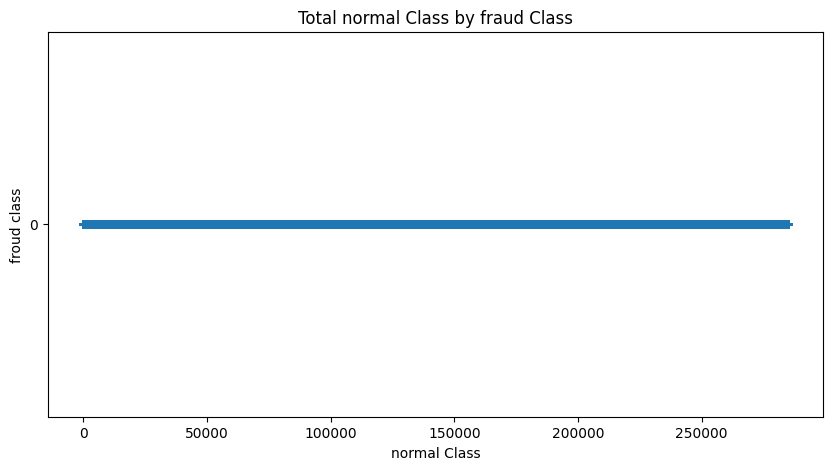

In [ ]:
plt.figure(figsize=(10, 5))
average_runs = df.groupby('Class').sum().reset_index()
print(average_runs)


plt.plot(df_normal['Class'].astype(str), marker='+')
plt.title('Total normal Class by fraud Class')
plt.xlabel('normal Class')
plt.ylabel('froud class')

In [ ]:
df.drop(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11','V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21','V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],axis=1,inplace=True, errors='ignore')
print(df.drop)

<bound method DataFrame.drop of           Amount  Class
0       17982.10      0
1        6531.37      0
2        2513.54      0
3        5384.44      0
4       14278.97      0
...          ...    ...
568625   4394.16      1
568626   4653.40      1
568627  23572.85      1
568628  10160.83      1
568629  21493.92      1

[568630 rows x 2 columns]>


In [ ]:
df.columns

Index(['Amount', 'Class'], dtype='object')

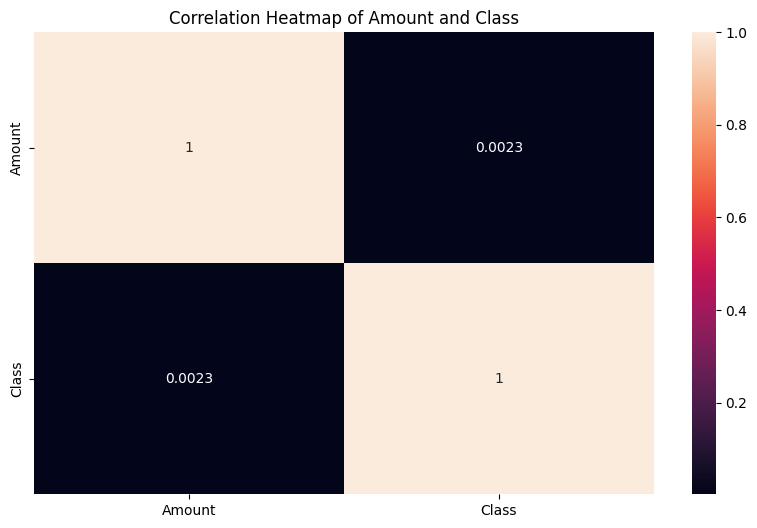

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,annot=True,fmt=".2g")
plt.title('Correlation Heatmap of Amount and Class')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.50


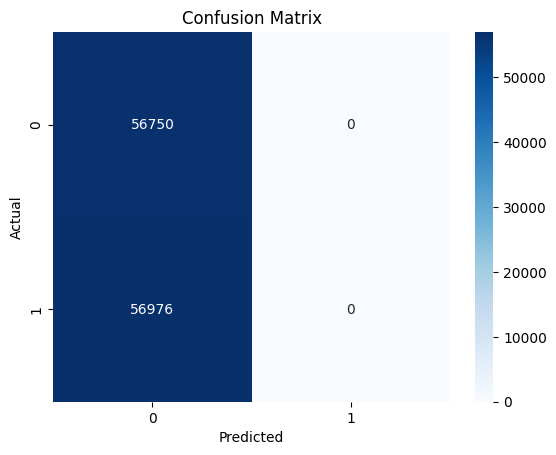

In [ ]:
# Optional: Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


In [ ]:
# Print metrics
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² Score: -1.0040
Mean Squared Error (MSE): 0.5010
Root Mean Squared Error (RMSE): 0.7078


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
df.head(2)

,Amount,Class
0,17982.10,0
1,6531.37,0


In [ ]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=2,
    bootstrap=True,
    random_state=42
)


In [ ]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                       random_state=42)

In [ ]:
# Make predictions
y_pred = rf.predict(X_test)

In [ ]:
display(y_test)
print(y_pred)

,Class
437378,1
504222,1
4794,0
388411,1
424512,1
...,...
172633,0
183013,0
484066,1
426713,1


[1 1 1 ... 0 1 1]


In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5022949897121151

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49     56750
           1       0.50      0.53      0.52     56976

    accuracy                           0.50    113726
   macro avg       0.50      0.50      0.50    113726
weighted avg       0.50      0.50      0.50    113726



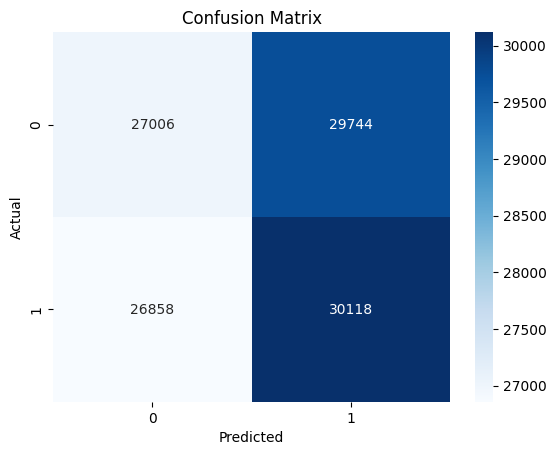

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


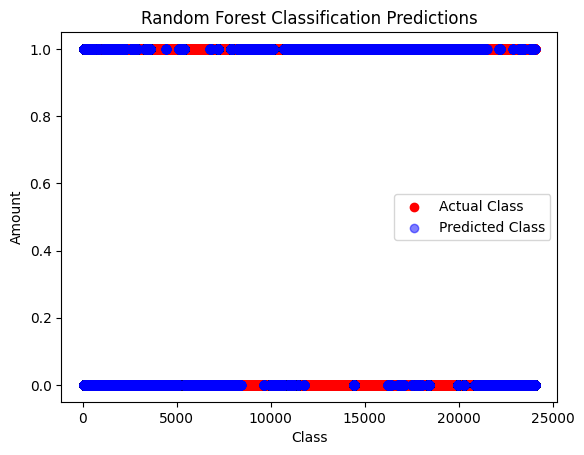

In [ ]:
plt.scatter(X_train, y_train, color='red', label='Actual Class')
y_train_pred = rf.predict(X_train) # Compute predictions for the training set
plt.scatter(X_train, y_train_pred, color='blue', alpha=0.5, label='Predicted Class') # Use scatter for classification predictions
plt.title('Random Forest Classification Predictions') # Updated title for classification
plt.xlabel('Class') # Corrected typo
plt.ylabel('Amount') # Corrected typo
plt.legend()
plt.show()

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(
    n_estimators=200,        # No. of trees
    learning_rate=0.05,      # Step size
    max_depth=4,             # Tree depth
    subsample=0.8,           # Random rows sample
    colsample_bytree=0.8,    # Random features sample
    random_state=42,
    eval_metric='logloss'
)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.499235003429295

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50     56750
           1       0.50      0.49      0.50     56976

    accuracy                           0.50    113726
   macro avg       0.50      0.50      0.50    113726
weighted avg       0.50      0.50      0.50    113726



In [ ]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Confusion Matrix:
 [[28863 27887]
 [29063 27913]]


In [ ]:
from sklearn.metrics import roc_auc_score
model.fit(X_train, y_train) # Ensure the model is fitted
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("\nROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


ROC-AUC Score: 0.49707736080544623


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.51      0.50     56750
           1       0.50      0.49      0.50     56976

    accuracy                           0.50    113726
   macro avg       0.50      0.50      0.50    113726
weighted avg       0.50      0.50      0.50    113726

